# Average Source Statistics at L-band

_Author:_ Bradley Frank

In your project, you will need to construct a variety of models to test the performance of your telescope. Of course, after you've made a models with a few point sources, you will want to construct something that looks reasonably realistic. 
At L-band (21cm/1.4GHz), we have a good understanding of the radio (continuum) sky to make a few well-educated guesses about the best way to construct a realistic looking sky model, based on the NVSS. 

**Important Note**: This notebook provides a few relations to generate a distribution for radio sources that are _brigher_ than about 50mJy. Of course, the target sensitivity of your survey is _much_ lower than this, and indeed the micro-Jansky radio sky has thousands of sources per-degree. However, it isn't feasible (or necessary) to generate more than a few tens of sources for your project. Therefore, the guidelines in this notebook are a reasonable starting point for your project.

In this notebook I have produced a few statistical distributions that could inform your model building, which is based on my experience with the NVSS.
Feel free to experiment with the parameters by adding your own cells.

Note that these distributions are totally **approximate** in nature, but will probably produce radio continuum models which look reasonable. 

Please generate your own models with your own source distributions, to understand your telescope performance.

In [74]:
import pylab as pl
import numpy as np
from scipy.special import erf
from scipy.stats import norm

%matplotlib inline
def make_axes(figure=None, xlabel='', ylabel='', title=None):
    pl.xticks(fontsize=14)
    pl.yticks(fontsize=14)
    pl.xlabel(xlabel, fontsize=16)
    pl.ylabel(ylabel, fontsize=16)
    pl.grid()
    pl.title(title, fontsize=18)

In [84]:
# Copied how to do this from StackOverflow
# https://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy

from scipy import linspace
from scipy import pi,sqrt,exp
from scipy.special import erf

from pylab import plot,show

def pdf(x):
    return 1/sqrt(2*pi) * exp(-x**2/2)

def cdf(x):
    return (1 + erf(x/sqrt(2))) / 2

def skew(x,e=0,w=1,a=0):
    t = (x-e) / w
    return 2 / w * pdf(t) * cdf(a*t)
    # You can of course use the scipy.stats.norm versions
    # return 2 * norm.pdf(t) * norm.cdf(a*t)



## Flux Distribution

The following plot shows the number of sources that you could expect for a given flux density. For example, you could expect about 15 sources that have a flux density of about 300mJy, and about two sources with a flux density of about 0.5Jy.

**NOTE**: I've just used a reversed Gaussian cumulative distribution to produce the desired functional form of the distribution. This is a very crude approximation, and you will probably find better methods in Condon's paper on the NVSS, for example.

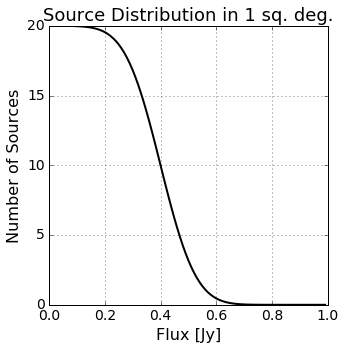

In [55]:
x = np.arange(0,1.,0.01)
mu = 0.4
sigma=0.1
y = 0.5*(1+erf((x-mu)/(sigma*np.sqrt(2.))))
pl.figure(figsize=(5,5))
pl.plot(x,20.*(-y+1), 'k-', lw=2)
make_axes(figure=fig,xlabel='Flux [Jy]', ylabel='Number of Sources', title='Source Distribution in 1 sq. deg.')

## Source Sizes

Again, I'm going to use a very crude approximation for this, i.e., I'm going to assume that the sources are Gaussian distributed, but are skewed towards point sources, producing a few extended sources. The mock sources that you produce are all 2D Gaussians, with a major-axis and minor-axis. The cell below illustrates the distribution of major-axes of your sources.

(0, 25)

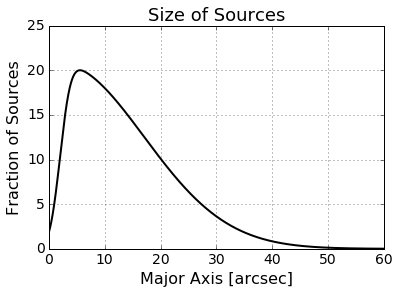

In [108]:
x = np.arange(0,60.,0.01)
e = 2.0 # location
w = 15.0 # scale
a = 10. 
y = skew(x,e,w,a)
N_max = 20.
pl.plot(x, y*N_max/y.max(), 'k-', lw=2)
make_axes(xlabel='Major Axis [arcsec]', ylabel='Fraction of Sources', title='Size of Sources')
pl.ylim(0,25)

## Source Morphology

Finally, given the major-axis distibution from the cell above, you can calculate the average morphology of the sources using the relationship below. Again, I've used a Gaussian distribution for the ratio of major/minor axes of the 2D Gaussians that you can use. 

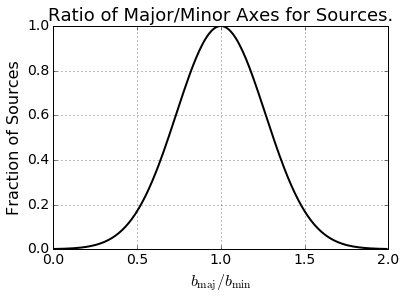

In [122]:
x = np.arange(0,2.,0.01)
mu = 1.
sigma=0.1
y = np.exp(-(x-mu)**2/(np.sqrt(2.)*sigma))
pl.plot(x,(y), 'k-', lw=2)
make_axes(xlabel='$b_\mathrm{maj}/b_\mathrm{min}$', ylabel='Fraction of Sources', title='Ratio of Major/Minor Axes for Sources.')